<a href="https://colab.research.google.com/github/djasantos/PhD/blob/master/Source_Apportionment_of_Black_Carbon_WoodBurning_and_FossilFuel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reference Paper: [Using Aerosol Light Absorption
Measurements for the Quantitative
Determination of Wood Burning and
Traffic Emission Contributions to
Particulate Matter](https://https://pubs.acs.org/doi/10.1021/es702253m)

In [104]:
# Import libraries
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
# Read Data from csv  
campinasDF = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Doutorado/Database and Plots/Camp2py.csv')

In [149]:
alphaFF = 1.1
kFF = (470/950)**(-alphaFF)
alphaWB = 2.8
kWB = (470/950)**(-alphaWB)

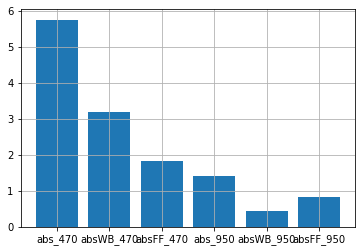

In [150]:
# Incluir testes sensitivos
campinasDF['absFF_470'] = (campinasDF['abs_470'] - kWB*campinasDF['abs_950'])/(1-kWB/kFF)
campinasDF['absWB_470'] = campinasDF['abs_470'] - campinasDF['absFF_470']
campinasDF['absFF_950'] = campinasDF['absFF_470']/kFF
campinasDF['absWB_950'] = campinasDF['abs_950'] - campinasDF['absFF_950']
plt.bar(['abs_470','absWB_470','absFF_470','abs_950','absWB_950','absFF_950'],
        campinasDF[['abs_470','absWB_470','absFF_470','abs_950','absWB_950','absFF_950']].median())
plt.grid()

In [152]:
campinasDF.corr()

,utctime,localtime,org,blackcarbon,so4,no3,nh4,chl,pm1,svooa,hoa,lvooa,bboa,dgm,o3,no2,so2,scat_450,scat_525,scat_635,abs_370,abs_470,abs_520,abs_590,abs_660,abs_880,abs_950,bc_370,bc_470,bc_520,bc_590,bc_660,bc_880,bc_950,sae,aae,ssa,dSSA,f43,f44,f60,temp,wdir,wspeed,Unnamed: 44,absFF_370,absWB_370,absFF_880,absWB_880,absFF_470,absWB_470,absFF_950,absWB_950
utctime,1.000000,1.000000,0.035322,-0.080288,0.090283,-0.007873,0.097415,-0.106398,0.039045,-0.108457,-0.051384,0.167681,-0.032277,-0.693902,-0.106850,-0.215451,0.057405,-0.248258,-0.239854,-0.166588,-0.353967,-0.353317,-0.339726,-0.324227,-0.302923,-0.235461,-0.216539,-0.362754,-0.343393,-0.330251,-0.316659,-0.306793,-0.280683,-0.277822,-0.060767,-0.425089,-0.120389,-0.089355,0.221693,0.192284,-0.189527,0.200409,0.053931,-0.188120,NaN,-0.069621,-0.358655,-0.067082,-0.387954,-0.030323,-0.389185,-0.030323,-0.389185
localtime,1.000000,1.000000,0.035205,-0.080342,0.090209,-0.007930,0.097335,-0.106417,0.038931,-0.108542,-0.051454,0.167547,-0.032378,-0.693928,-0.106853,-0.215471,0.057386,-0.248321,-0.239916,-0.166635,-0.354034,-0.353388,-0.339795,-0.324295,-0.302989,-0.235520,-0.216595,-0.362824,-0.343463,-0.330320,-0.316727,-0.306860,-0.280747,-0.277886,-0.060765,-0.425139,-0.120380,-0.089360,0.221705,0.192260,-0.189562,0.200440,0.053931,-0.188118,NaN,-0.069655,-0.358719,-0.067116,-0.388023,-0.030351,-0.389253,-0.030351,-0.389253
org,0.035322,0.035205,1.000000,0.716565,0.402290,0.712699,0.533135,0.390348,0.953233,0.823033,0.785380,0.805734,0.845665,0.433048,0.142137,0.365873,0.237824,0.896482,0.879162,0.853327,0.855624,0.822071,0.804362,0.780310,0.748043,0.646393,0.620109,0.855893,0.811418,0.793270,0.771709,0.753618,0.717171,0.712366,-0.035757,0.414948,0.067934,0.033386,0.122078,-0.268298,0.408819,0.023082,0.048950,-0.074807,NaN,0.298929,0.845918,0.344708,0.830422,0.281082,0.819737,0.281082,0.819737
blackcarbon,-0.080288,-0.080342,0.716565,1.000000,0.412543,0.668549,0.525892,0.536431,0.805446,0.647221,0.777478,0.596492,0.631629,0.451901,-0.104780,0.693647,0.153039,0.716979,0.713681,0.541118,0.860796,0.954109,0.975379,0.985685,0.995849,0.980463,0.959349,0.915789,0.968556,0.983224,0.990213,0.995320,0.999998,0.999899,-0.191513,0.237440,-0.250674,0.029521,0.024587,-0.243069,0.228754,-0.145078,0.061967,-0.052367,NaN,0.764867,0.737048,0.785342,0.826249,0.700137,0.773624,0.700137,0.773624
so4,0.090283,0.090209,0.402290,0.412543,1.000000,0.587669,0.892244,0.198172,0.622099,0.253804,0.256653,0.419481,0.368696,-0.004812,0.038419,0.131780,0.168965,0.588198,0.610151,0.634041,0.355520,0.390864,0.403421,0.405765,0.407615,0.387597,0.378324,0.359019,0.387921,0.399341,0.404037,0.409387,0.416271,0.416090,-0.322035,0.039369,0.275231,-0.010916,-0.004165,-0.027008,0.155156,-0.063272,0.129535,0.294032,NaN,0.302995,0.311298,0.299612,0.345281,0.268580,0.330994,0.268580,0.330994
no3,-0.007873,-0.007930,0.712699,0.668549,0.587669,1.000000,0.765332,0.391457,0.836774,0.546641,0.602724,0.563857,0.611520,0.340105,-0.197002,0.393111,0.085648,0.764085,0.773068,0.779977,0.658505,0.682951,0.686822,0.688318,0.676412,0.617237,0.598074,0.659228,0.674205,0.677631,0.682774,0.680359,0.671887,0.669649,-0.279812,0.168631,0.056349,0.008295,0.134558,-0.239648,0.263559,-0.167050,0.067857,0.026231,NaN,0.398098,0.613734,0.407531,0.646354,0.353987,0.629374,0.353987,0.629374
nh4,0.097415,0.097335,0.533135,0.525892,0.892244,0.765332,1.000000,0.328444,0.739391,0.360449,0.397372,0.516904,0.459982,0.112566,-0.015241,0.239008,0.123435,0.685244,0.701595,0.718250,0.481820,0.518771,0.530129,0.530413,0.527597,0.492384,0.478994,0.482807,0.512551,0.523286,0.526412,0.530453,0.533367,0.532746,-0.305095,0.094734,0.203955,0.010650,0.060898,-0.081833,0.188828,-0.076061,0.116300,0.194822,NaN,0.362871,0.432892,0.361523,0.471843,0.320309,0.455509,0.320309,0.455509
chl,-0.106398,-0.106417,0.390348,0.536431,0.198172,0.391457,0.328444,1.000000,0.552423,0.324640,0.455780,0.163627,0.334398,0.194638,-0.161992,0.294886,0.044749,0.435864,0.439521,0.44